# Course 2 - Bayesian Thinking
* <ins>Bayes' Rule</ins>: named after the Rev. Thomas Bayes and allows for the possibility of an uncertain world, and the necessity of exploring said world to gather information to inform decisions.

## Uncertainty
* <ins>Control noise</ins>: response to a fixed input can change over time
* <ins>State space</ins>: the set of all possible outcomes for a probabilistic event.
    * For a coin the state space for a "flip" event can be written mathematically as {H, T}
    * When calculating the truth table for $N$ events which each have a state space size of $x$, we need to make $x^N$ calculations. $x^N$ gets very big very fast as x or N get bigger (i.e. exponential complexity growth).

---
## Probability
* Probability and Statistics have an inverse relationship:
    * Statistics starts with data and infers the underlying causes of said data
    * Probability starts with causes and infers the underlying data of those causes.

Complementary Outcomes (i.e. Probability of an Opposite Event) - Coins
* For an unfair coin, the $P(Heads) = 0.7$ , so the $P(Tails) = 1 - P(Heads)$

Simple Probability of Composite Events (i.e. two events occurring in a row, independently)
* For a fair coin, the probability of two heads in a row is $P(H, H) = 0.5 * 0.5 = 0.25$
* For an unfair coin, the probability of heads is $P(H) = 0.6$ . So the joint probability of $P(H, H) = 0.6 * 0.6 = 0.36$
* For an unfair coin, the probability of heads is $P(H) = 1.0$ . So the joint probability of $P(H, H) = 1.0$ and the joint probability of $P(H, T) = 1.0 * 0.0 = 0.0$

Probability of Composite Events Continued - Coins
* For a fair coin, thrown 3 times, what is the probability that exactly one flip comes up heads
    * $P(\text{Exactly one H in 3 flips}) = 0.125 + 0.125 + 0.125 = 0.375$ 
* For an unfair coin, the $P(Heads) = 0.6$ , what is the probability that exactly one flip comes up heads
    * $0.6 * 0.4 * 0.4 = 0.096$
    * $P(\text{Exactly one H in 3 flips}) = (0.6 * 0.4 * 0.4) + (0.4 * 0.6 * 0.4) + (0.4 * 0.4 * 0.6) = 0.096 + 0.096 + 0.096 = 0.288$

Probability of Composite Events - Dice
* For a fair die, $P(Dice = Even) = 0.5$
* For a fair die, $P(Double) = (1/6 * 1/6) * 6 = 0.1667$

---
## Conditional Probability

Math Notation
| Symbol | Usage | Interpretation |
|--------|-------|----------------|
| $P$    | $P(A)$    | The probability of event $A$ occurring |
| $\neg$ | $P(\neg A)$ | the probability of NOT $A$ |
|  \| | $P(A\|B)$    | the probability of $A$ occurring given that event $B$ occurs |
| $,$  | $P(A, B)$    | the probability of event $A$ AND event $B$ both occurring |

Dependent probability
* If A and B are NOT independent events, and $P(A) = 0.2$, $P(B) = 0.1$, and $P(B|A) = 0.3$ what is P(A|B)?
    * To find $P(A|B)$, we can use $\text{Bayes' Theorem} = P(A|B) = P(B|A) * P(A)/P(B) = P(A|B) = 0.6$


Law of Total Probability
If $B_1, B_2, B_3$ is a partition of a sample space $S$, then for any event $A$:

$P(A) = \sum_i P(A \cap B_i) = \sum_i P(A|B_i) \cdot P(B_i)$

In other words, calculate the sum of all probabilities necessary to ensure all scenarios for specified events are included.



---
## Programming Probability
* <ins>Encapsulation</ins>: Always run your probability code in a functional scope for code clarity

#### Coin Flip Simulation


In [13]:
import random as rd

def simulate_coin_flips(num_trials, p_heads=0.5):
    '''
    A function to simulate coin flips
    
    Args:
        num_trials (int): The number of coin flip trials to simulate
        p_heads (float): the probability of heads, default value is a fair coin, i.e. 0.5
    Returns:
        int: The percentage of heads from the trials
    '''
    heads = 0 # A counter for the number of heads
    tails = 0 # A counter for the number of tails

    # Simulate coin flips up to the num_trials specified
    for i in range(num_trials):
        # Collect a random number between [0,1]
        random_number = rd.random()
        # If the number is less than heads count it as heads
        # Otherwise, count it as tails
        if random_number < p_heads:
            heads = heads + 1
        else:
            tails += 1
    # Calculate the percentage of heads based on the number of 
    # heads and trials
    percent_heads = heads / num_trials
    return percent_heads
    
percentage = simulate_coin_flips(1000) # calling the function
print(percentage)# Import the random module and reference it as rd


0.542


#### Dice Roll Simulation

In [14]:
import random as rd


def simulate_dice_rolls(N):
    """
    Simulates dice rolls
    
    Args:
        N (int): The number of trials
        
    Returns:
        list: roll counts [1,6]
    """
    # Create a list to track the 6 options for the roll
    roll_counts = [0,0,0,0,0,0]
    for i in range(N):
        # Randomly select a value from the list (1 to 6)
        roll = rd.choice([1,2,3,4,5,6]) 
        # Recall indices start at 0 so we need to decrement
        index = roll - 1
        roll_counts[index] = roll_counts[index] + 1
    return roll_counts

def show_roll_data(roll_counts):
    """
    Shows the dice roll data
    
    Args:
        roll_counts (list): The roll counts stored in the list
        
    Returns:
        list: roll counts [1,6]
    """ 
    # Gets the number of sides of the dice and prints
    # the side of the die. 
    # enumerate creates the position of the die and the
    # list value
    for dice_side, frequency in enumerate(roll_counts):
        print(dice_side + 1, "was rolled", frequency, "times")
        
roll_data = simulate_dice_rolls(1000)
show_roll_data(roll_data)

1 was rolled 148 times
2 was rolled 171 times
3 was rolled 160 times
4 was rolled 179 times
5 was rolled 151 times
6 was rolled 191 times


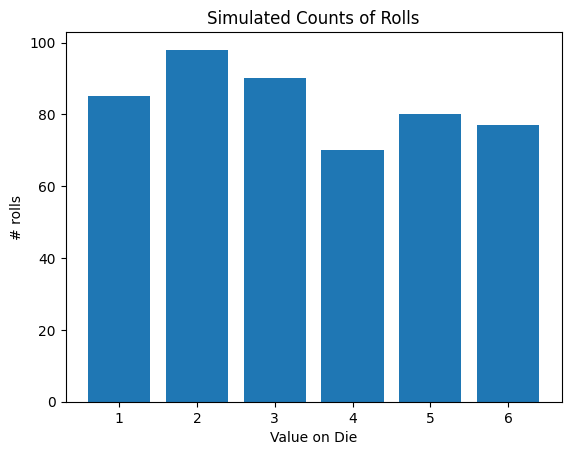

In [15]:
# Matplotlib is one of the most common plotting packages in Python
# to use it more succinctly, you can call it   
from matplotlib import pyplot as plt
# This line is needed
%matplotlib inline

def visualize_one_die(roll_data):
    """
    Visualizes the dice rolls
    
    Args:
        roll_data (int): roll counts in a list from [1,6]
        
    Returns:
        None - shows a plot with the x-axis is the dice values
               and the y-axis as the frequency for t
    """
    roll_outcomes = [1,2,3,4,5,6]
    fig, ax = plt.subplots()
    ax.bar(roll_outcomes, roll_data)
    ax.set_xlabel("Value on Die")
    ax.set_ylabel("# rolls")
    ax.set_title("Simulated Counts of Rolls")
    plt.show()
    
roll_data = simulate_dice_rolls(500)
visualize_one_die(roll_data)

## Bayes' Rule

$\text{Bayes Rule = Prior Probability + Test Evidence -> Posterior Probability}$

* <ins>Prior Probability</ins>: the probability before we ran a test
* <ins>Posterior</ins>: the probabiility after running the test

#### Question 1
<ins>Question</ins>: 1% of the population has cancer. Given that there is a 90% chance that you will test positive if you have cancer and that there is a 90% chance you will test negative if you don't have cancer, what is the probability that you have cancer if you test positive (i.e. $P(Cancer|Positive)$?

<ins>Answer</ins>: 8.33%
* priors: 
    * $P(Cancer) = 0.01 = 1\%$
    * $P(\text{Positive Result}|Cancer) = 0.9 = 90\% $
    * $P(\text{Positive Result}|\neg Cancer) = 0.1 = 10\% $
    * $P(\text{Negative Result}|\neg Cancer) = 0.9 = 90\% $
    * $P(\neg Cancer) = 0.99 = 99\%$
* posterior: 
    * $P(Cancer|\text{Positive Result}) = P(C) * P(\text{Positive Result}|Cancer) = 0.01 * 0.9 = 0.009$
    * $P(\neg Cancer|\text{Positive Result})$ = $P(\neg Cancer) * P(Positive|\neg Cancer) = 0.99 * 0.1 = 0.099$

